Cross-selling recommendations for banking products - ABC Analytics
Client - XYZ Client 

Name: Cross-selling Products

Report date: 14th Sept 2022 

Email: ppaulomee4698@gmail.com

Country: Canada

Specialization: Data Analyst 

Group: Myself

Problem Statement: In this project, our client is a Latin American credit union company XYZ. They are having issues in cross-selling banking products such as credit cards, savings accounts, retirement accounts, and safe deposit boxes. It can take a significant amount of research and business knowledge to increase cross-selling. In order to succeed in the cross-selling area of the business, Data Analyst at ABC analytics is searching for the best technique to be recommended.

Business statement: The goal of ABC analytics company is to perform Exploratory data analysis on the data provided by the client and gain some meaningful insights. As a Data analyst intern, my job was to perform EDA on the credit union’s dataset and create visualizations to analyze the data and to provide recommendations to the company to increase effective cross-selling of banking products.

In [1]:
#Importing necessery libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#importing data

df_raw = pd.read_csv("Train.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_16328\4283193611.py:3: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("Train.csv")


In [3]:
df_raw.shape

(13647309, 48)

In [4]:
df_raw.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
#renaming columns

dict = {'fecha_dato' : 'Date',
       'ncodpers' : 'Customer_Code',
       'ind_empleado' : 'Employee_Index',
       'pais_residencia' : 'Country',
       'sexo' : 'Gender',
       'age' : 'Age',
       'fecha_alta' : 'Customer_Join_Date',
       'ind_nuevo' : 'Customer_Index',
       'antiguedad' : 'Customer_Seniority',
       'indrel' : 'Primary_Customer',
       'ult_fec_cli_1t' : 'Customer_Leave_Date',
       'indrel_1mes' : 'Customer_Type',
       'tiprel_1mes' : 'Customer_Relation',
       'indresi' : 'Residence_Index',
       'indext' : 'Foriegner_Index',
       'conyuemp' : 'Spouse_Index',
       'canal_entrada' : 'Channel_Used',
       'indfall' : 'Deceased_Index',
       'tipodom' : 'Primary_Address',
       'cod_prov' : 'Customer_Address',
       'nomprov' : 'Province',
       'ind_actividad_cliente' : 'Activity_Index',
       'renta' : 'Gross_Income',
       'segmento' : 'Segmentation',
       'ind_ahor_fin_ult1' : 'Saving_Account',
        'ind_aval_fin_ult1' : 'Guarantees',
        'ind_cco_fin_ult1' : 'Current_Accounts',
        'ind_cder_fin_ult1' : 'Derivative_Account',
        'ind_cno_fin_ult1' : 'Payroll_Account',
        'ind_ctju_fin_ult1' : 'Junior_Account',
        'ind_ctma_fin_ult1' : 'More_Private_Account',
        'ind_ctop_fin_ult1' : 'Private_Account',
        'ind_ctpp_fin_ult1' : 'Private_Plus_Account',
        'ind_deco_fin_ult1' : 'Short_Term_Deposits',
        'ind_deme_fin_ult1' : 'Medium_Term_Deposits',
        'ind_dela_fin_ult1' : 'Long_Term_Deposits',
        'ind_ecue_fin_ult1' : 'E_Account',
        'ind_fond_fin_ult1' : 'Funds',
        'ind_hip_fin_ult1' : 'Mortgage',
        'ind_plan_fin_ult1' : 'Pensions',
        'ind_pres_fin_ult1' : 'Loans',
        'ind_reca_fin_ult1' : 'Taxes',
        'ind_tjcr_fin_ult1' : 'Credit_Card',
        'ind_valo_fin_ult1' : 'Securities',
        'ind_viv_fin_ult1' : 'Home_Account',
        'ind_nomina_ult1' : 'Payroll',
        'ind_nom_pens_ult1' : 'Pensions2',
        'ind_recibo_ult1' : 'Direct_Debit'
       }

df_raw = df_raw.rename(columns = dict)

In [6]:
df_raw.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Customer_Code         int64  
 2   Employee_Index        object 
 3   Country               object 
 4   Gender                object 
 5   Age                   object 
 6   Customer_Join_Date    object 
 7   Customer_Index        float64
 8   Customer_Seniority    object 
 9   Primary_Customer      float64
 10  Customer_Leave_Date   object 
 11  Customer_Type         object 
 12  Customer_Relation     object 
 13  Residence_Index       object 
 14  Foriegner_Index       object 
 15  Spouse_Index          object 
 16  Channel_Used          object 
 17  Deceased_Index        object 
 18  Primary_Address       float64
 19  Customer_Address      float64
 20  Province              object 
 21  Activity_Index        float64
 22  Gross_Income          float64
 23  Segme

In [8]:
#converting datatype of dates

df_raw['Date'] = pd.to_datetime(df_raw['Date'])

In [9]:
df_raw['Customer_Join_Date'] = pd.to_datetime(df_raw['Customer_Join_Date'])

In [10]:
df_raw['Customer_Leave_Date'] = pd.to_datetime(df_raw['Customer_Leave_Date'])

In [11]:
#null value count
df_raw.isnull().sum()

Date                           0
Customer_Code                  0
Employee_Index             27734
Country                    27734
Gender                     27804
Age                            0
Customer_Join_Date         27734
Customer_Index             27734
Customer_Seniority             0
Primary_Customer           27734
Customer_Leave_Date     13622516
Customer_Type             149781
Customer_Relation         149781
Residence_Index            27734
Foriegner_Index            27734
Spouse_Index            13645501
Channel_Used              186126
Deceased_Index             27734
Primary_Address            27735
Customer_Address           93591
Province                   93591
Activity_Index             27734
Gross_Income             2794375
Segmentation              189368
Saving_Account                 0
Guarantees                     0
Current_Accounts               0
Derivative_Account             0
Payroll_Account                0
Junior_Account                 0
More_Priva

In [12]:
#our working data
df = df_raw.copy()

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Leave_Date,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Spouse_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaT,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaT,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaT,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaT,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaT,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [15]:
#changing datatypes

for column in ["Employee_Index", "Country", "Gender"]:
    df[column] = df[column].astype('category')

In [16]:
#Total number of different types of employees
print(df['Employee_Index'].value_counts(dropna = False))

N      13610977
NaN       27734
B          3566
F          2523
A          2492
S            17
Name: Employee_Index, dtype: int64


In [17]:
#dropping null values

df = df.dropna(subset = ['Employee_Index'])

In [18]:
print(df['Employee_Index'].value_counts(dropna = False))

N    13610977
B        3566
F        2523
A        2492
S          17
Name: Employee_Index, dtype: int64


In [19]:
print(df['Customer_Leave_Date'].value_counts(dropna = False))

NaT           13594782
2015-12-24         763
2015-12-28         521
2015-07-09         443
2015-07-06         405
                ...   
2016-04-28          44
2015-08-19          44
2015-08-06          41
2016-01-04          34
2015-12-23          27
Name: Customer_Leave_Date, Length: 224, dtype: int64


In [20]:
end = pd.to_datetime('2016-05-28')
df['Customer_Leave_Date'] = df['Customer_Leave_Date'].fillna(end)

In [21]:
print(df['Customer_Leave_Date'].value_counts(dropna = False))

2016-05-28    13594782
2015-12-24         763
2015-12-28         521
2015-07-09         443
2015-07-06         405
                ...   
2016-04-28          44
2015-08-19          44
2015-08-06          41
2016-01-04          34
2015-12-23          27
Name: Customer_Leave_Date, Length: 224, dtype: int64


In [22]:
print(df['Customer_Join_Date'].value_counts(dropna = False))

2014-07-28    57389
2014-10-03    54287
2014-08-04    45746
2013-10-14    40804
2013-08-03    33414
              ...  
2014-04-27       11
2015-05-31        9
2014-05-01        7
2010-07-04        4
2009-12-25        4
Name: Customer_Join_Date, Length: 6756, dtype: int64


In [23]:
#keeping just one data for each customer

df = df.drop_duplicates(subset='Customer_Code', keep="last")
df

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Leave_Date,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Spouse_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
3777108,2015-07-28,641620,N,ES,H,70,2010-06-29,0.0,105,99.0,2015-07-01,1.0,I,S,N,NaN,KFC,N,1.0,28.0,MADRID,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3779471,2015-07-28,641917,N,ES,H,45,2006-10-25,1.0,4,99.0,2015-07-30,1.0,A,S,N,NaN,KHN,N,1.0,47.0,VALLADOLID,0.0,NaN,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3779546,2015-07-28,642089,N,ES,V,73,2006-09-17,0.0,104,99.0,2015-07-09,1.0,I,S,N,NaN,KAT,N,1.0,33.0,ASTURIAS,0.0,NaN,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3779561,2015-07-28,642064,N,ES,H,34,2006-09-17,0.0,105,99.0,2015-07-07,1.0,A,S,N,NaN,KFC,N,1.0,28.0,MADRID,0.0,NaN,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3780974,2015-07-28,630274,N,ES,H,47,2006-07-29,0.0,107,99.0,2015-07-07,1.0,I,S,N,NaN,KFC,N,1.0,28.0,MADRID,0.0,NaN,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,2016-05-28,1,I,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,0.0,43912.17,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,2016-05-28,1,I,S,N,NaN,KHE,N,1.0,26.0,"RIOJA, LA",0.0,23334.99,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,2016-05-28,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,2016-05-28,1.0,I,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,0.0,199592.82,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [24]:
df.reset_index(inplace=True)

In [25]:
df = df.drop('index', axis = 1)

In [26]:
#there is an outlier with Employee Index 'S', that does not exist. 
df.loc[df['Employee_Index'] == 'S']

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Leave_Date,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Spouse_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
53077,2016-05-28,720152,S,ES,H,39,2007-09-21,0.0,104,1.0,2016-05-28,1.0,A,S,N,NaN,KAT,N,1.0,28.0,MADRID,1.0,87798.24,01 - TOP,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1.0,1.0,1


In [27]:
i = df.loc[df['Employee_Index'] == 'S'].index
df = df.drop(i)

In [28]:
df.shape

(949613, 48)

In [29]:
#renaming values

df = df.replace({'Employee_Index':{'N':'Not An Employee', 'A': 'Active Employee', 'B': 'Ex Employee', 'F': 'Employee Relative'}})
plot2 = df['Employee_Index'].value_counts()
plot2

Not An Employee      949094
Ex Employee             219
Employee Relative       152
Active Employee         148
S                         0
Name: Employee_Index, dtype: int64

Null values, wrong entry, and inappropriate nomenclature fixed in Employee_Index row

In [30]:
plot2.to_csv('Employee Index.csv')

In [31]:
print(df['Country'].value_counts())

ES    945595
FR       317
AR       289
GB       286
DE       285
       ...  
DJ         1
ML         1
MM         1
MT         1
ZW         1
Name: Country, Length: 118, dtype: int64


The row 'Country' has no null values and is appropriate

In [35]:
country.to_csv('Country.csv')

In [36]:
print(df['Gender'].value_counts(dropna = False))

V      515572
H      434036
NaN         5
Name: Gender, dtype: int64


In [37]:
from random import choice

mask = df["Gender"].isna()

df.loc[mask,["Gender"]] = df.loc[mask,["Gender"]].applymap(lambda _: choice(["V","H"]))

In [38]:
print(df['Gender'].value_counts(dropna = False))

V    515575
H    434038
Name: Gender, dtype: int64


In [39]:
df = df.replace({'Gender':{'H':'Male', 'V': 'Female'}})

In [40]:
print(df['Age'].value_counts(dropna = False))

24     51365
23     50383
22     48421
21     47244
25     40081
       ...  
 47        1
103        1
 41        1
 11        1
 70        1
Name: Age, Length: 127, dtype: int64


In [41]:
print(df['Customer_Type'].value_counts(dropna = False))

1.0    461707
1.0    287746
1      191489
NaN      7655
3.0       277
3         245
3.0       225
P         101
2          50
2.0        48
2.0        33
4.0        16
4.0        13
4           8
Name: Customer_Type, dtype: int64


In [42]:
df = df.dropna(subset = ['Customer_Type'])

In [44]:
df = df.astype(object).replace({'Customer_Type':{1.0:'Primary Customer', 1: 'Primary Customer', 2.0: 'Co-Owner', 2: 'Co-Owner', 3.0: 'Former Primary Customer', 3: 'Former Primary Customer', 4.0: 'Former Co-Owner', 4: 'Former Co-Owner', 'P': 'Potential Customer'}})
plot3 = df['Customer_Type'].value_counts()
plot3

Primary Customer           940942
Former Primary Customer       747
Co-Owner                      131
Potential Customer            101
Former Co-Owner                37
Name: Customer_Type, dtype: int64

In [45]:
plot3.to_csv('Customer Type.csv')

In [46]:
print(df['Customer_Index'].value_counts(dropna = False))

0.0    906392
1.0     35566
Name: Customer_Index, dtype: int64


In [47]:
df = df.replace({'Customer_Index':{0.0: 'Old_Customer', 1.0: 'New_Customer'}})

In [48]:
plot3 = df['Customer_Index'].value_counts()
plot3

Old_Customer    906392
New_Customer     35566
Name: Customer_Index, dtype: int64

In [49]:
plot3.to_csv('Customer Index.csv')

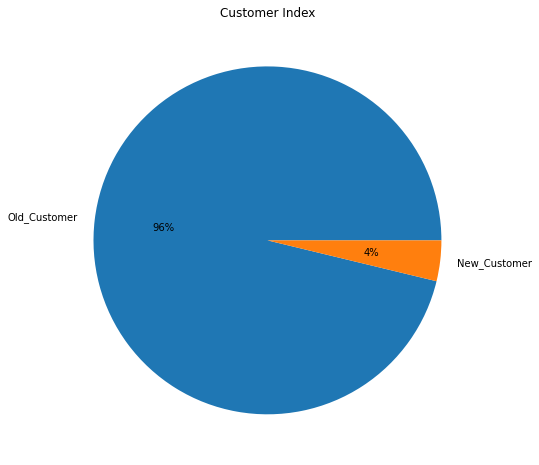

In [50]:
plot3.plot.pie(y = plot3.index, figsize=(8,8), title = 'Customer Index', label = '', autopct='%.0f%%')
plt.show() 

Only 4% of the customers are new in XYZ Credit Union

In [51]:
df['Customer_Seniority'] = df['Customer_Seniority'].astype('int')

In [52]:
print(df['Customer_Seniority'].value_counts(dropna = False))

 7         26931
 31        24217
 8         23238
 19        21836
 10        20638
           ...  
 253         151
 256         102
 254          85
 255          77
-999999        3
Name: Customer_Seniority, Length: 258, dtype: int64


In [53]:
df = df.replace({'Customer_Seniority':{-999999: 1}})

In [55]:
seniority = df['Customer_Seniority'].value_counts(dropna = False)
seniority

7      26931
31     24217
8      23238
19     21836
10     20638
       ...  
249      207
253      151
256      102
254       85
255       77
Name: Customer_Seniority, Length: 257, dtype: int64

In [56]:
seniority.to_csv('Seniority.csv')

In [57]:
print(df['Primary_Customer'].value_counts(dropna = False))

1.0     926407
99.0     15551
Name: Primary_Customer, dtype: int64


In [58]:
print(df['Customer_Relation'].value_counts(dropna = False))

I    540968
A    400105
P       784
R       101
Name: Customer_Relation, dtype: int64


In [59]:
df = df.replace({'Customer_Relation':{'I': 'Inactive', 'A': 'Active', 'P': 'Former Customer', 'R': 'Potential'}})

In [60]:
relation = df['Customer_Relation'].value_counts(dropna = False)
relation

Inactive           540968
Active             400105
Former Customer       784
Potential             101
Name: Customer_Relation, dtype: int64

In [61]:
relation.to_csv('Customer Relation.csv')

In [62]:
print(df['Residence_Index'].value_counts(dropna = False))

S    937940
N      4018
Name: Residence_Index, dtype: int64


In [63]:
df = df.replace({'Residence_Index':{'S': 'Yes', 'N': 'No'}})

In [64]:
residence = df['Residence_Index'].value_counts(dropna = False)
residence

Yes    937940
No       4018
Name: Residence_Index, dtype: int64

In [65]:
print(df['Foriegner_Index'].value_counts(dropna = False))

N    895262
S     46696
Name: Foriegner_Index, dtype: int64


In [66]:
df = df.replace({'Foriegner_Index':{'S': 'Yes', 'N': 'No'}})

In [67]:
print(df['Foriegner_Index'].value_counts(dropna = False))

No     895262
Yes     46696
Name: Foriegner_Index, dtype: int64


In [68]:
df['Residence_Index'].equals(df['Foriegner_Index'])

False

In [69]:
print(df['Spouse_Index'].value_counts(dropna = False))

NaN    941837
N         120
S           1
Name: Spouse_Index, dtype: int64


In [70]:
df['Spouse_Index'] = df['Spouse_Index'].fillna(0)

In [71]:
df = df.replace({'Spouse_Index':{0: 'Not Applicable', 'N': 'No', 'S': 'Yes'}})

In [72]:
print(df['Spouse_Index'].value_counts(dropna = False))

Not Applicable    941837
No                   120
Yes                    1
Name: Spouse_Index, dtype: int64


In [73]:
print(df['Channel_Used'].value_counts(dropna = False))

KHE    254201
KAT    208364
KFC    203005
KHQ     76219
KHM     33207
        ...  
025         1
KHR         1
KDB         1
KDI         1
KGN         1
Name: Channel_Used, Length: 163, dtype: int64


In [74]:
print(df['Deceased_Index'].value_counts(dropna = False))

N    939228
S      2730
Name: Deceased_Index, dtype: int64


In [75]:
df = df.replace({'Deceased_Index':{'S': 'Yes', 'N': 'No'}})

In [76]:
print(df['Deceased_Index'].value_counts(dropna = False))

No     939228
Yes      2730
Name: Deceased_Index, dtype: int64


2730 customers have died

In [77]:
print(df['Primary_Address'].value_counts(dropna = False))

1.0    941958
Name: Primary_Address, dtype: int64


In [78]:
df['Customer_Address'].fillna(np.random.randint(1.0, 50.0))

0         28.0
1         47.0
2         33.0
3         28.0
4         28.0
          ... 
949608    50.0
949609    50.0
949610    26.0
949611    50.0
949612    50.0
Name: Customer_Address, Length: 941958, dtype: float64

In [79]:
print(df['Customer_Address'].value_counts(dropna = False))

28.0    302509
8.0      89731
46.0     48574
41.0     41027
15.0     29093
30.0     27970
29.0     24821
50.0     23427
3.0      22449
11.0     20029
36.0     19151
33.0     18549
35.0     16515
47.0     16252
6.0      13096
45.0     12844
48.0     12709
18.0     12541
37.0     11217
39.0     10949
14.0      9963
7.0       9274
10.0      8693
13.0      8177
21.0      8113
2.0       7900
43.0      7731
12.0      7243
9.0       6751
17.0      6376
31.0      6102
26.0      5882
24.0      5814
27.0      5732
32.0      5668
25.0      5481
38.0      5187
20.0      4962
19.0      4757
23.0      4561
4.0       4379
NaN       4018
16.0      3839
49.0      3448
34.0      3393
40.0      2927
22.0      2825
5.0       2667
1.0       2642
44.0      1563
42.0      1272
52.0       644
51.0       521
Name: Customer_Address, dtype: int64


In [80]:
df = df.dropna(subset = ['Customer_Address'])

In [81]:
province = df['Province'].value_counts(dropna = False)
province

MADRID                    302509
BARCELONA                  89731
VALENCIA                   48574
SEVILLA                    41027
CORUÑA, A                  29093
MURCIA                     27970
MALAGA                     24821
ZARAGOZA                   23427
ALICANTE                   22449
CADIZ                      20029
PONTEVEDRA                 19151
ASTURIAS                   18549
PALMAS, LAS                16515
VALLADOLID                 16252
BADAJOZ                    13096
TOLEDO                     12844
BIZKAIA                    12709
GRANADA                    12541
SALAMANCA                  11217
CANTABRIA                  10949
CORDOBA                     9963
BALEARS, ILLES              9274
CACERES                     8693
CIUDAD REAL                 8177
HUELVA                      8113
ALBACETE                    7900
TARRAGONA                   7731
CASTELLON                   7243
BURGOS                      6751
GIRONA                      6376
NAVARRA   

In [82]:
province.to_csv('Province.csv')

In [83]:
print(df['Activity_Index'].value_counts(dropna = False))

0.0    544426
1.0    393514
Name: Activity_Index, dtype: int64


In [84]:
df = df.replace({'Activity_Index':{0.0: 'Inactive Customer', 1.0: 'Active Customer'}})

In [85]:
df['Gross_Income'].isna().sum()

228658

In [86]:
df['Gross_Income'].fillna((df['Gross_Income'].mean()), inplace=True)

In [87]:
df['Gross_Income'].isna().sum()

0

In [88]:
#Average Gross Income

average_income = df["Gross_Income"].mean()
print(average_income)

134095.86652797047


In [89]:
df['Average_Income_Test'] = 0
df['Average_Income_Test'] = ['Above Average Income' if x >= average_income else 'Below Average Income' for x in (df['Gross_Income'])]
df.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Leave_Date,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Spouse_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit,Average_Income_Test
0,2015-07-28 00:00:00,641620,Not An Employee,Spain,Male,70,2010-06-29 00:00:00,Old_Customer,105,99.0,2015-07-01 00:00:00,Primary Customer,Inactive,Yes,No,Not Applicable,KFC,No,1.0,28.0,MADRID,Inactive Customer,134095.866528,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,Above Average Income
1,2015-07-28 00:00:00,641917,Not An Employee,Spain,Male,45,2006-10-25 00:00:00,New_Customer,4,99.0,2015-07-30 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KHN,No,1.0,47.0,VALLADOLID,Inactive Customer,134095.866528,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,Above Average Income
2,2015-07-28 00:00:00,642089,Not An Employee,Spain,Female,73,2006-09-17 00:00:00,Old_Customer,104,99.0,2015-07-09 00:00:00,Primary Customer,Inactive,Yes,No,Not Applicable,KAT,No,1.0,33.0,ASTURIAS,Inactive Customer,134095.866528,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,Above Average Income
3,2015-07-28 00:00:00,642064,Not An Employee,Spain,Male,34,2006-09-17 00:00:00,Old_Customer,105,99.0,2015-07-07 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KFC,No,1.0,28.0,MADRID,Inactive Customer,134095.866528,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,Above Average Income
4,2015-07-28 00:00:00,630274,Not An Employee,Spain,Male,47,2006-07-29 00:00:00,Old_Customer,107,99.0,2015-07-07 00:00:00,Primary Customer,Inactive,Yes,No,Not Applicable,KFC,No,1.0,28.0,MADRID,Inactive Customer,134095.866528,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,Above Average Income


In [90]:
print(df['Segmentation'].value_counts(dropna = False))

02 - PARTICULARES     547932
03 - UNIVERSITARIO    350192
01 - TOP               35795
NaN                     4021
Name: Segmentation, dtype: int64


In [91]:
df = df.replace({'Segmentation':{'01 - TOP': 'VIP', '02 - PARTICULARES': 'Individuals', '03 - UNIVERSITARIO': 'College Graduate'}})

In [92]:
print(df['Segmentation'].value_counts(dropna = False))

Individuals         547932
College Graduate    350192
VIP                  35795
NaN                   4021
Name: Segmentation, dtype: int64


In [94]:
from random import choice

mask = df["Segmentation"].isna()

df.loc[mask,["Segmentation"]] = df.loc[mask,["Segmentation"]].applymap(lambda _: choice(["Individuals","College Graduate", "VIP"]))

In [98]:
segmentation = df['Segmentation'].value_counts(dropna = False)
segmentation

Individuals         549238
College Graduate    351540
VIP                  37162
Name: Segmentation, dtype: int64

In [99]:
segmentation.to_csv('Segmentation.csv')

In [100]:
print(df['Saving_Account'].value_counts(dropna = False))

0    937862
1        78
Name: Saving_Account, dtype: int64


In [101]:
print(df['Guarantees'].value_counts(dropna = False))

0    937925
1        15
Name: Guarantees, dtype: int64


In [102]:
print(df['Current_Accounts'].value_counts(dropna = False))

1    557521
0    380419
Name: Current_Accounts, dtype: int64


In [103]:
print(df['Derivative_Account'].value_counts(dropna = False))

0    937625
1       315
Name: Derivative_Account, dtype: int64


In [104]:
print(df['Payroll_Account'].value_counts(dropna = False))

0    864957
1     72983
Name: Payroll_Account, dtype: int64


In [105]:
print(df['Junior_Account'].value_counts(dropna = False))

0    930386
1      7554
Name: Junior_Account, dtype: int64


In [106]:
print(df['More_Private_Account'].value_counts(dropna = False))

0    929994
1      7946
Name: More_Private_Account, dtype: int64


In [107]:
print(df['Private_Account'].value_counts(dropna = False))

0    838197
1     99743
Name: Private_Account, dtype: int64


In [108]:
print(df['Private_Plus_Account'].value_counts(dropna = False))

0    904786
1     33154
Name: Private_Plus_Account, dtype: int64


In [109]:
print(df['Short_Term_Deposits'].value_counts(dropna = False))

0    937625
1       315
Name: Short_Term_Deposits, dtype: int64


In [110]:
print(df['Medium_Term_Deposits'].value_counts(dropna = False))

0    936933
1      1007
Name: Medium_Term_Deposits, dtype: int64


In [111]:
print(df['Long_Term_Deposits'].value_counts(dropna = False))

0    906850
1     31090
Name: Long_Term_Deposits, dtype: int64


In [112]:
print(df['E_Account'].value_counts(dropna = False))

0    862364
1     75576
Name: E_Account, dtype: int64


In [113]:
print(df['Funds'].value_counts(dropna = False))

0    923379
1     14561
Name: Funds, dtype: int64


In [114]:
print(df['Mortgage'].value_counts(dropna = False))

0    933420
1      4520
Name: Mortgage, dtype: int64


In [115]:
print(df['Loans'].value_counts(dropna = False))

0    935950
1      1990
Name: Loans, dtype: int64


In [116]:
print(df['Taxes'].value_counts(dropna = False))

0    892170
1     45770
Name: Taxes, dtype: int64


In [117]:
print(df['Credit_Card'].value_counts(dropna = False))

0    903247
1     34693
Name: Credit_Card, dtype: int64


In [118]:
print(df['Securities'].value_counts(dropna = False))

0    916777
1     21163
Name: Securities, dtype: int64


In [119]:
print(df['Home_Account'].value_counts(dropna = False))

0    934984
1      2956
Name: Home_Account, dtype: int64


In [120]:
print(df['Payroll'].value_counts(dropna = False))

0.0    889626
1.0     48314
Name: Payroll, dtype: int64


In [121]:
print(df['Direct_Debit'].value_counts(dropna = False))

0    824803
1    113137
Name: Direct_Debit, dtype: int64


In [122]:
print(df['Pensions'].value_counts(dropna = False))

0    930626
1      7314
Name: Pensions, dtype: int64


In [123]:
print(df['Pensions2'].value_counts(dropna = False))

0.0    885092
1.0     52848
Name: Pensions2, dtype: int64


In [124]:
print(df['Deceased_Index'].value_counts(dropna = False))

No     935222
Yes      2718
Name: Deceased_Index, dtype: int64


In [125]:
Average_Income_Test = df['Average_Income_Test'].value_counts(dropna = False)
Average_Income_Test

Below Average Income    477842
Above Average Income    460098
Name: Average_Income_Test, dtype: int64

In [253]:
Average_Income_Test.to_csv('Average_Income.csv')

In [127]:
#cleaned data
df.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Leave_Date,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Spouse_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit,Average_Income_Test
0,2015-07-28 00:00:00,641620,Not An Employee,Spain,Male,70,2010-06-29 00:00:00,Old_Customer,105,99.0,2015-07-01 00:00:00,Primary Customer,Inactive,Yes,No,Not Applicable,KFC,No,1.0,28.0,MADRID,Inactive Customer,134095.866528,Individuals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,Above Average Income
1,2015-07-28 00:00:00,641917,Not An Employee,Spain,Male,45,2006-10-25 00:00:00,New_Customer,4,99.0,2015-07-30 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KHN,No,1.0,47.0,VALLADOLID,Inactive Customer,134095.866528,Individuals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,Above Average Income
2,2015-07-28 00:00:00,642089,Not An Employee,Spain,Female,73,2006-09-17 00:00:00,Old_Customer,104,99.0,2015-07-09 00:00:00,Primary Customer,Inactive,Yes,No,Not Applicable,KAT,No,1.0,33.0,ASTURIAS,Inactive Customer,134095.866528,Individuals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,Above Average Income
3,2015-07-28 00:00:00,642064,Not An Employee,Spain,Male,34,2006-09-17 00:00:00,Old_Customer,105,99.0,2015-07-07 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KFC,No,1.0,28.0,MADRID,Inactive Customer,134095.866528,Individuals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,Above Average Income
4,2015-07-28 00:00:00,630274,Not An Employee,Spain,Male,47,2006-07-29 00:00:00,Old_Customer,107,99.0,2015-07-07 00:00:00,Primary Customer,Inactive,Yes,No,Not Applicable,KFC,No,1.0,28.0,MADRID,Inactive Customer,134095.866528,Individuals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,Above Average Income


In [128]:
df.shape

(937940, 49)

In [129]:
df = df.astype({'Customer_Code': 'int64',
                'Employee_Index': 'object',
               'Country': 'object',
               'Gender': 'object',
               'Age': 'int64',
               'Customer_Index': 'object',
               'Customer_Seniority': 'float64',
               'Primary_Customer': 'float64',
               'Customer_Type': 'object',
               'Customer_Relation': 'object',
               'Residence_Index': 'object',
               'Foriegner_Index': 'object',
               'Spouse_Index': 'object',
               'Channel_Used': 'object',
               'Deceased_Index': 'object',
               'Primary_Address': 'float64',
               'Customer_Address': 'float64',
               'Province': 'object',
               'Activity_Index': 'object',
               'Gross_Income': 'float64',
               'Segmentation': 'object',
               'Saving_Account': 'int64',
               'Guarantees': 'int64',
               'Current_Accounts': 'int64',
               'Derivative_Account': 'int64',
               'Payroll_Account': 'int64',
               'Junior_Account': 'int64',
               'More_Private_Account': 'int64',
               'Private_Account': 'int64',
               'Private_Plus_Account': 'int64',
               'Short_Term_Deposits': 'int64',
               'Medium_Term_Deposits': 'int64',
               'Long_Term_Deposits': 'int64',
               'E_Account': 'int64',
               'Funds': 'int64',
               'Mortgage': 'int64',
               'Pensions': 'int64',
               'Loans': 'int64',
               'Taxes': 'int64',
               'Credit_Card': 'int64',
               'Securities': 'int64',
               'Home_Account': 'int64',
               'Payroll': 'float64',
               'Pensions2': 'float64',
               'Direct_Debit': 'int64'})

In [130]:
df.describe()

,Customer_Code,Age,Customer_Seniority,Primary_Customer,Primary_Address,Customer_Address,Gross_Income,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
count,9.379400e+05,937940.000000,937940.000000,937940.000000,937940.0,937940.000000,9.379400e+05,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000,937940.000000
mean,8.818157e+05,40.133314,79.389980,2.622328,1.0,26.543453,1.340959e+05,0.000083,0.000016,0.594410,0.000336,0.077812,0.008054,0.008472,0.106343,0.035348,0.000336,0.001074,0.033147,0.080577,0.015524,0.004819,0.007798,0.002122,0.048798,0.036989,0.022563,0.003152,0.051511,0.056345,0.120623
std,4.474853e+05,17.203839,67.186207,12.504252,0.0,12.836024,2.020070e+05,0.009119,0.003999,0.491006,0.018323,0.267876,0.089381,0.091651,0.308276,0.184657,0.018323,0.032749,0.179021,0.272184,0.123626,0.069252,0.087961,0.046013,0.215446,0.188734,0.148507,0.056050,0.221037,0.230586,0.325689
min,1.588900e+04,2.000000,0.000000,1.000000,1.0,1.000000,1.202730e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.868272e+05,25.000000,22.000000,1.000000,1.0,15.000000,7.821926e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.697135e+05,38.000000,54.000000,1.000000,1.0,28.000000,1.311975e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.267246e+06,50.000000,134.000000,1.000000,1.0,35.000000,1.340959e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.548516e+06,164.000000,256.000000,99.000000,1.0,52.000000,2.889440e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
df.skew(axis = 0, skipna = True, numeric_only = None)

C:\Users\user\AppData\Local\Temp\ipykernel_16328\697691454.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True, numeric_only = None)


Customer_Code            -0.339857
Age                       0.835871
Customer_Seniority        0.723495
Primary_Customer          7.577866
Primary_Address           0.000000
Customer_Address         -0.124605
Gross_Income             60.927033
Saving_Account          109.644472
Guarantees              250.053061
Current_Accounts         -0.384559
Derivative_Account       54.539868
Payroll_Account           3.152126
Junior_Account           11.007869
More_Private_Account     10.726051
Private_Account           2.553935
Private_Plus_Account      5.032606
Short_Term_Deposits      54.539868
Medium_Term_Deposits     30.470053
Long_Term_Deposits        5.215641
E_Account                 3.081919
Funds                     7.837761
Mortgage                 14.300851
Pensions                 11.191392
Loans                    21.640939
Taxes                     4.188534
Credit_Card               4.906517
Securities                6.429854
Home_Account             17.728637
Payroll             

In [132]:
plot4 = df.corr()
plot4

,Customer_Code,Age,Customer_Seniority,Primary_Customer,Primary_Address,Customer_Address,Gross_Income,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
Customer_Code,1.000000,-0.602355,-0.955754,0.058662,NaN,-0.037549,-0.066660,-0.012346,-0.004204,0.129299,-0.018195,-0.105473,-0.013033,0.022718,-0.422164,-0.154190,-0.019434,-0.032267,-0.121822,-0.138300,-0.136997,-0.091260,-0.112068,-0.035946,-0.181095,-0.176692,-0.165786,-0.070644,-0.098541,-0.111183,-0.115490
Age,-0.602355,1.000000,0.589966,0.000737,NaN,0.047592,0.056516,0.004768,0.000945,-0.160391,0.012951,0.057027,-0.140913,0.034967,0.295856,0.111506,0.012595,0.024279,0.161404,0.144935,0.108820,0.036710,0.062496,0.023712,0.093895,0.094007,0.104939,0.017490,0.035467,0.064422,0.081384
Customer_Seniority,-0.955754,0.589966,1.000000,-0.074226,NaN,0.039083,0.067219,0.013114,0.004639,-0.127969,0.019222,0.109044,0.014458,-0.042314,0.449738,0.154121,0.020499,0.033311,0.113712,0.127572,0.145437,0.098189,0.121667,0.036944,0.184533,0.183082,0.176727,0.077486,0.104371,0.116642,0.121108
Primary_Customer,0.058662,0.000737,-0.074226,1.000000,NaN,-0.002529,0.000355,-0.001183,-0.000519,-0.157014,-0.002378,-0.037687,-0.011691,-0.011993,-0.044756,-0.024836,-0.002378,-0.004253,-0.024023,-0.038409,-0.016225,-0.008908,-0.011502,-0.005619,-0.014804,-0.025427,-0.019712,-0.007295,-0.028421,-0.029638,-0.037199
Primary_Address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Address,-0.037549,0.047592,0.039083,-0.002529,NaN,1.000000,-0.014152,0.001080,0.000454,0.001501,0.000734,0.011200,0.008693,0.006380,0.037815,0.013951,0.000874,0.004136,0.014686,0.019235,0.006430,-0.003078,0.003234,-0.007857,0.006827,0.007550,0.012990,0.003857,0.009534,0.010512,0.012613
Gross_Income,-0.066660,0.056516,0.067219,0.000355,NaN,-0.014152,1.000000,0.002362,0.001004,-0.021129,0.001537,0.011262,0.007416,0.001861,0.034226,0.019744,0.001449,0.001609,0.014413,0.021544,0.021012,0.003368,0.017786,-0.004353,0.032048,0.023126,0.024852,0.008791,0.009564,0.012374,0.014908
Saving_Account,-0.012346,0.004768,0.013114,-0.001183,NaN,0.001080,0.002362,1.000000,-0.000036,-0.000087,-0.000167,0.001716,-0.000822,-0.000843,0.010128,0.003320,-0.000167,-0.000299,0.002230,0.001596,0.001692,0.002742,0.004508,-0.000421,0.006617,0.001310,0.005700,0.012003,-0.000009,0.000307,0.002007
Guarantees,-0.004204,0.000945,0.004639,-0.000519,NaN,0.000454,0.001004,-0.000036,1.000000,-0.001040,-0.000073,0.008791,-0.000360,0.002539,0.002080,0.007897,-0.000073,-0.000131,0.000749,0.010570,0.003811,-0.000278,-0.000355,-0.000184,0.007756,0.009104,0.011959,-0.000225,0.008717,0.008272,0.010798
Current_Accounts,0.129299,-0.160391,-0.127969,-0.157014,NaN,0.001501,-0.021129,-0.000087,-0.001040,1.000000,0.005067,-0.293792,-0.109010,-0.010429,0.042401,-0.020191,0.008386,0.015279,0.034857,-0.034441,0.024938,-0.031880,-0.016676,-0.019012,-0.055192,-0.060078,0.033856,0.001779,-0.212322,-0.223851,-0.019293


<AxesSubplot:>

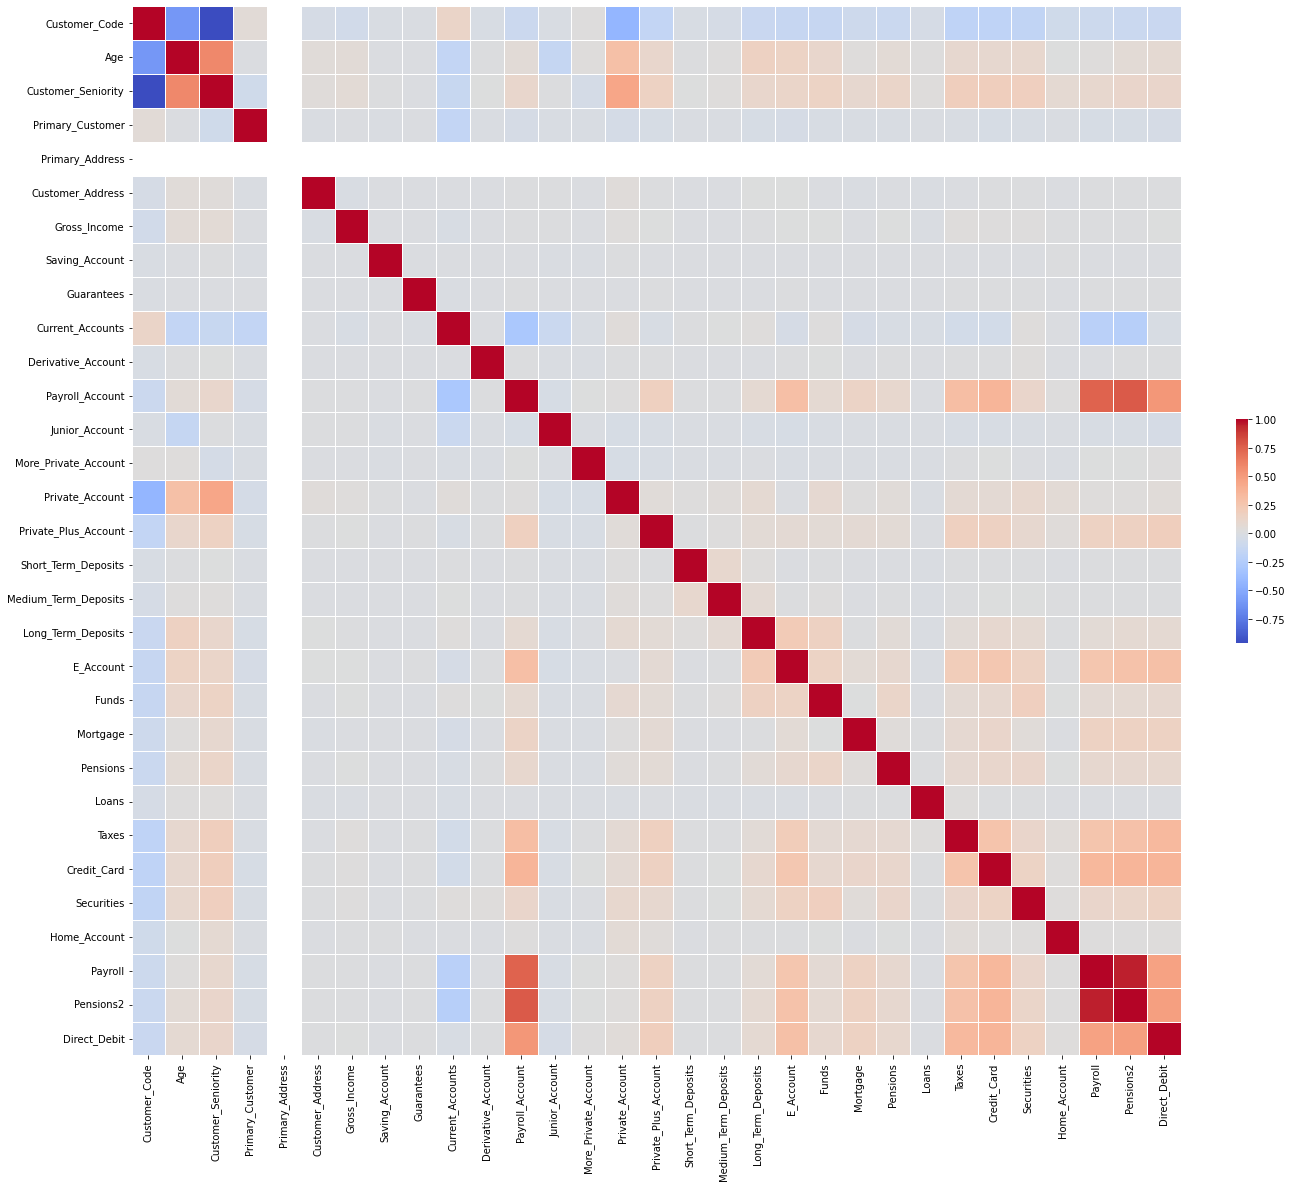

In [134]:
plt.figure(figsize=(20,20))
sns.heatmap(
    plot4, 
    square=True, cbar_kws={'fraction' : 0.01}, cmap='coolwarm',
    linewidth=1
)

The above correlation chart shows that Payroll is highly related to Pensions2. And Payroll Account is highly related to Pensions2, Payroll, Debit and Credit Card.

In [135]:
plot5 = df['Activity_Index'].value_counts(dropna = False)
plot5

Inactive Customer    544426
Active Customer      393514
Name: Activity_Index, dtype: int64

In [136]:
plot5.to_csv('Activity Index.csv')

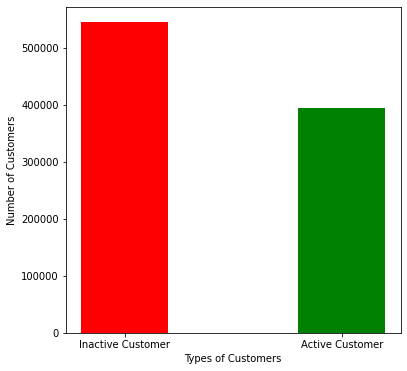

In [137]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(plot5.index, plot5.values, width=0.4, color = ['Red', 'Green'])
plt.ylabel('Number of Customers')
plt.xlabel('Types of Customers')
plt.show()

This shows that there are more number of inactive customers than active customers in the bank.

In [138]:
df = df.replace({'Saving_Account':{0: 'No', 1: 'Yes'}})

In [139]:
savings_account = df['Saving_Account'].value_counts(dropna = False)
savings_account

No     937862
Yes        78
Name: Saving_Account, dtype: int64

In [140]:
savings_account.to_csv('Savings Account.csv')

In [141]:
df = df.replace({'Guarantees':{0: 'No', 1: 'Yes'}})

In [142]:
guarantees = df['Guarantees'].value_counts(dropna = False)
guarantees

No     937925
Yes        15
Name: Guarantees, dtype: int64

In [143]:
guarantees.to_csv('Guarantees.csv')

In [144]:
df = df.replace({'Current_Accounts':{0: 'No', 1: 'Yes'}})

In [145]:
current_accounts = df['Current_Accounts'].value_counts(dropna = False)
current_accounts 

Yes    557521
No     380419
Name: Current_Accounts, dtype: int64

In [146]:
current_accounts.to_csv('Current Accounts.csv')

In [147]:
df = df.replace({'Derivative_Account':{0: 'No', 1: 'Yes'}})

In [148]:
derivative_accounts = df['Derivative_Account'].value_counts(dropna = False)
derivative_accounts

No     937625
Yes       315
Name: Derivative_Account, dtype: int64

In [149]:
derivative_accounts.to_csv('Derivative Accounts.csv')

In [150]:
df = df.replace({'Payroll_Account':{0: 'No', 1: 'Yes'}})

In [151]:
payroll_account = df['Payroll_Account'].value_counts(dropna = False)
payroll_account

No     864957
Yes     72983
Name: Payroll_Account, dtype: int64

In [152]:
payroll_account.to_csv('Payroll Account.csv')

In [153]:
df = df.replace({'Junior_Account':{0: 'No', 1: 'Yes'}})

In [154]:
junior_account = df['Junior_Account'].value_counts(dropna = False)
junior_account

No     930386
Yes      7554
Name: Junior_Account, dtype: int64

In [155]:
junior_account.to_csv('Junior_Account.csv')

In [156]:
df = df.replace({'More_Private_Account':{0: 'No', 1: 'Yes'}})

In [157]:
more_private_account = df['More_Private_Account'].value_counts(dropna = False)
more_private_account

No     929994
Yes      7946
Name: More_Private_Account, dtype: int64

In [158]:
more_private_account.to_csv('More Private Account.csv')

In [159]:
df = df.replace({'Private_Account':{0: 'No', 1: 'Yes'}})

In [160]:
private_account = df['Private_Account'].value_counts(dropna = False)
private_account

No     838197
Yes     99743
Name: Private_Account, dtype: int64

In [161]:
private_account.to_csv('Private_Account.csv')

In [162]:
df = df.replace({'Private_Plus_Account':{0: 'No', 1: 'Yes'}})

In [163]:
private_plus_account = df['Private_Plus_Account'].value_counts(dropna = False)
private_plus_account

No     904786
Yes     33154
Name: Private_Plus_Account, dtype: int64

In [164]:
private_plus_account.to_csv('Private_Plus_Account.csv')

In [165]:
df = df.replace({'Short_Term_Deposits':{0: 'No', 1: 'Yes'}})

In [166]:
short_term_deposits = df['Short_Term_Deposits'].value_counts(dropna = False)
short_term_deposits

No     937625
Yes       315
Name: Short_Term_Deposits, dtype: int64

In [167]:
short_term_deposits.to_csv('Short Term Deposits.csv')

In [168]:
df = df.replace({'Medium_Term_Deposits':{0: 'No', 1: 'Yes'}})

In [169]:
medium_term_deposits = df['Medium_Term_Deposits'].value_counts(dropna = False)
medium_term_deposits

No     936933
Yes      1007
Name: Medium_Term_Deposits, dtype: int64

In [170]:
medium_term_deposits.to_csv('Medium Term Deposits.csv')

In [171]:
df = df.replace({'Long_Term_Deposits':{0: 'No', 1: 'Yes'}})

In [172]:
long_term_deposits = df['Long_Term_Deposits'].value_counts(dropna = False)
long_term_deposits

No     906850
Yes     31090
Name: Long_Term_Deposits, dtype: int64

In [173]:
long_term_deposits.to_csv('Long Term Deposits.csv')

In [174]:
df = df.replace({'E_Account':{0: 'No', 1: 'Yes'}})

In [175]:
e_account = df['E_Account'].value_counts(dropna = False)
e_account

No     862364
Yes     75576
Name: E_Account, dtype: int64

In [176]:
e_account.to_csv('E Account.csv')

In [177]:
df = df.replace({'Funds':{0: 'No', 1: 'Yes'}})

In [178]:
funds = df['Funds'].value_counts(dropna = False)
funds

No     923379
Yes     14561
Name: Funds, dtype: int64

In [179]:
funds.to_csv('Funds.csv')

In [180]:
df = df.replace({'Mortgage':{0: 'No', 1: 'Yes'}})

In [181]:
mortgage = df['Mortgage'].value_counts(dropna = False)
mortgage

No     933420
Yes      4520
Name: Mortgage, dtype: int64

In [182]:
mortgage.to_csv('Mortgage.csv')

In [183]:
df = df.replace({'Loans':{0: 'No', 1: 'Yes'}})

In [184]:
loans = df['Loans'].value_counts(dropna = False)
loans

No     935950
Yes      1990
Name: Loans, dtype: int64

In [185]:
loans.to_csv('Loans.csv')

In [186]:
df = df.replace({'Taxes':{0: 'No', 1: 'Yes'}})

In [187]:
taxes = df['Taxes'].value_counts(dropna = False)
taxes

No     892170
Yes     45770
Name: Taxes, dtype: int64

In [188]:
taxes.to_csv('Taxes.csv')

In [189]:
df = df.replace({'Credit_Card':{0: 'No', 1: 'Yes'}})

In [190]:
credit_card = df['Credit_Card'].value_counts(dropna = False)
credit_card

No     903247
Yes     34693
Name: Credit_Card, dtype: int64

In [191]:
credit_card.to_csv('Credit Card.csv')

In [192]:
df = df.replace({'Securities':{0: 'No', 1: 'Yes'}})

In [193]:
securities = df['Securities'].value_counts(dropna = False)
securities

No     916777
Yes     21163
Name: Securities, dtype: int64

In [194]:
securities.to_csv('Securities.csv')

In [195]:
df = df.replace({'Home_Account':{0: 'No', 1: 'Yes'}})

In [196]:
home_account = df['Home_Account'].value_counts(dropna = False)
home_account

No     934984
Yes      2956
Name: Home_Account, dtype: int64

In [197]:
home_account.to_csv('Home Account.csv')

In [198]:
df = df.replace({'Payroll':{0: 'No', 1: 'Yes'}})

In [199]:
payroll = df['Payroll'].value_counts(dropna = False)
payroll

No     889626
Yes     48314
Name: Payroll, dtype: int64

In [200]:
payroll.to_csv('Payroll.csv')

In [201]:
df = df.replace({'Direct_Debit':{0: 'No', 1: 'Yes'}})

In [202]:
direct_debit = df['Direct_Debit'].value_counts(dropna = False)
direct_debit 

No     824803
Yes    113137
Name: Direct_Debit, dtype: int64

In [203]:
direct_debit.to_csv('Direct Debit.csv')

In [204]:
df = df.replace({'Pensions':{0: 'No', 1: 'Yes'}})

In [205]:
pensions = df['Pensions'].value_counts(dropna = False)
pensions

No     930626
Yes      7314
Name: Pensions, dtype: int64

In [206]:
pensions.to_csv('Pensions.csv')

In [207]:
df = df.replace({'Pensions2':{0: 'No', 1: 'Yes'}})

In [208]:
pensions2 = df['Pensions2'].value_counts(dropna = False)
pensions2

No     885092
Yes     52848
Name: Pensions2, dtype: int64

In [209]:
pensions2.to_csv('Pensions2.csv')

In [210]:
df1 = pd.concat([savings_account, guarantees, current_accounts, derivative_accounts, payroll_account, junior_account,
                more_private_account, private_account, private_plus_account, short_term_deposits, medium_term_deposits,
                long_term_deposits, e_account, funds, mortgage, loans, taxes, credit_card, securities, home_account, 
                payroll, direct_debit, pensions, pensions2], axis = 1)

In [211]:
df1

,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Direct_Debit,Pensions,Pensions2
No,937862,937925,380419,937625,864957,930386,929994,838197,904786,937625,936933,906850,862364,923379,933420,935950,892170,903247,916777,934984,889626,824803,930626,885092
Yes,78,15,557521,315,72983,7554,7946,99743,33154,315,1007,31090,75576,14561,4520,1990,45770,34693,21163,2956,48314,113137,7314,52848


In [212]:
df1.to_csv('Banking Products.csv')

In [213]:
#dropping inactive customers

df = df.drop(df[df.Activity_Index == 'Inactive Customer'].index)

In [214]:
df.shape

(393514, 49)

In [215]:
df_accounts = df[['Saving_Account', 'Guarantees', 'Current_Accounts', 'Derivative_Account', 'Payroll_Account',
                  'Junior_Account', 'More_Private_Account', 'Private_Account', 'Private_Plus_Account', 'Short_Term_Deposits',
                 'Medium_Term_Deposits', 'Long_Term_Deposits', 'E_Account', 'Funds','Mortgage', 'Pensions', 'Loans', 'Taxes',
                 'Credit_Card', 'Securities', 'Home_Account', 'Payroll', 'Pensions2', 'Direct_Debit']]

In [216]:
#checking number of accounts

df_accounts['Sum'] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_16328\2756679169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts['Sum'] = 0


In [217]:
df_accounts['Sum'] = (df_accounts[['Saving_Account','Guarantees', 'Current_Accounts','Derivative_Account', 'Payroll_Account',
                  'Junior_Account', 'More_Private_Account', 'Private_Account', 'Private_Plus_Account', 'Short_Term_Deposits',
                 'Medium_Term_Deposits', 'Long_Term_Deposits', 'E_Account', 'Funds','Mortgage', 'Pensions', 'Loans', 'Taxes',
                 'Credit_Card', 'Securities', 'Home_Account', 'Payroll', 'Pensions2', 'Direct_Debit']] == 'Yes').sum(axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_16328\980118090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts['Sum'] = (df_accounts[['Saving_Account','Guarantees', 'Current_Accounts','Derivative_Account', 'Payroll_Account',


In [218]:
df_accounts.head()

,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit,Sum
6,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
45,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,1
59,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
61,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
65,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0


In [219]:
df_accounts.shape

(393514, 25)

In [220]:
print(df_accounts['Sum'].value_counts(dropna = False))

1     168468
2     100918
3      47006
4      28622
5      17974
6      12654
7       8343
8       4442
0       2184
9       1896
10       691
11       239
12        62
13        12
14         2
15         1
Name: Sum, dtype: int64


In [221]:
df_accounts.drop(df_accounts[df_accounts.Sum == 0].index, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16328\2498976616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts.drop(df_accounts[df_accounts.Sum == 0].index, inplace=True)


In [222]:
print(df_accounts['Sum'].value_counts(dropna = False))

1     168468
2     100918
3      47006
4      28622
5      17974
6      12654
7       8343
8       4442
9       1896
10       691
11       239
12        62
13        12
14         2
15         1
Name: Sum, dtype: int64


In [223]:
df_accounts['Multiple_Accounts'] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_16328\4281272442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts['Multiple_Accounts'] = 0


In [224]:
df_accounts['Multiple_Accounts'] = ['Multiple Accounts' if x > 1 else 'Single Account' for x in (df_accounts['Sum'])]

C:\Users\user\AppData\Local\Temp\ipykernel_16328\4098781392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts['Multiple_Accounts'] = ['Multiple Accounts' if x > 1 else 'Single Account' for x in (df_accounts['Sum'])]


In [225]:
plot6 = df_accounts['Multiple_Accounts'].value_counts(dropna = False)
plot6

Multiple Accounts    222862
Single Account       168468
Name: Multiple_Accounts, dtype: int64

In [226]:
plot6.to_csv('Multiple Accounts.csv')

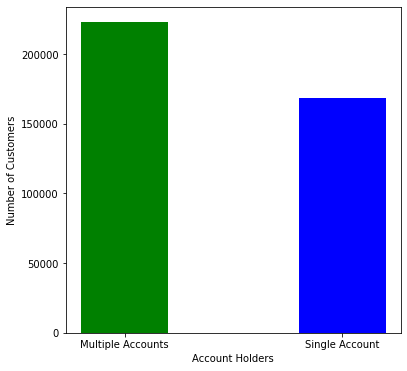

In [227]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(plot6.index, plot6.values, width=0.4, color = ['Green', 'Blue'])
plt.ylabel('Number of Customers')
plt.xlabel('Account Holders')
axes.legend
plt.show()

There are 168464 customers with single account. There are more number of customer holding multiple accounts than with single accounts. 

In [228]:
plot7 = df['Age'].value_counts()
plot7

21     14260
24     13494
22     13200
23     13084
45     11616
       ...  
116        3
114        2
109        2
112        2
117        1
Name: Age, Length: 115, dtype: int64

In [229]:
plot7.to_csv('Number of active customers by age.csv')

Text(0, 0.5, 'Number of Customer')

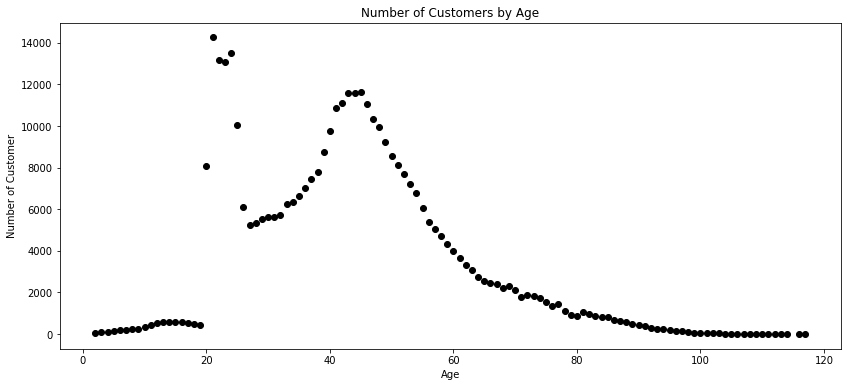

In [230]:
fig, axes = plt.subplots(figsize = (14,6))
plt.scatter(plot7.index, plot7.values, color = 'Black')
axes.set_title("Number of Customers by Age")
plt.xlabel("Age")
plt.ylabel("Number of Customer")

The most number of customers are from the Adult age group (Age: 20-55)

In [231]:
#getting number of accounts the Adult age group hold

array = np.arange(20,55)
df_age = df.loc[df['Age'].isin(array)]
df_age.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Leave_Date,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Spouse_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit,Average_Income_Test
6,2015-07-28 00:00:00,635756,Not An Employee,Spain,Female,41,2013-11-12 00:00:00,Old_Customer,20.0,99.0,2015-07-15 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KAT,No,1.0,28.0,MADRID,Active Customer,134095.866528,Individuals,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Above Average Income
59,2015-07-28 00:00:00,573108,Not An Employee,Spain,Female,43,2005-10-25 00:00:00,Old_Customer,116.0,99.0,2015-07-14 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KFC,No,1.0,28.0,MADRID,Active Customer,134095.866528,Individuals,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Above Average Income
61,2015-07-28 00:00:00,570012,Not An Employee,Spain,Female,41,2005-10-20 00:00:00,Old_Customer,81.0,99.0,2015-07-03 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KAT,No,1.0,30.0,MURCIA,Active Customer,134095.866528,Individuals,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Above Average Income
65,2015-07-28 00:00:00,588102,Not An Employee,Spain,Male,33,2005-12-28 00:00:00,Old_Customer,114.0,99.0,2015-07-21 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KFC,No,1.0,45.0,TOLEDO,Active Customer,134095.866528,Individuals,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Above Average Income
77,2015-07-28 00:00:00,539804,Not An Employee,Spain,Male,37,2005-07-05 00:00:00,Old_Customer,120.0,99.0,2015-07-13 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KAT,No,1.0,28.0,MADRID,Active Customer,134095.866528,Individuals,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Above Average Income


In [232]:
df_age['Sum'] = df_accounts['Sum'] 

C:\Users\user\AppData\Local\Temp\ipykernel_16328\477664025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Sum'] = df_accounts['Sum']


In [233]:
df_age['Multiple_Accounts'] = df_accounts['Multiple_Accounts'] 

C:\Users\user\AppData\Local\Temp\ipykernel_16328\3036964911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Multiple_Accounts'] = df_accounts['Multiple_Accounts']


In [234]:
df_age.shape

(307135, 51)

In [235]:
df_age.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Leave_Date,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Spouse_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit,Average_Income_Test,Sum,Multiple_Accounts
6,2015-07-28 00:00:00,635756,Not An Employee,Spain,Female,41,2013-11-12 00:00:00,Old_Customer,20.0,99.0,2015-07-15 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KAT,No,1.0,28.0,MADRID,Active Customer,134095.866528,Individuals,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Above Average Income,NaN,NaN
59,2015-07-28 00:00:00,573108,Not An Employee,Spain,Female,43,2005-10-25 00:00:00,Old_Customer,116.0,99.0,2015-07-14 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KFC,No,1.0,28.0,MADRID,Active Customer,134095.866528,Individuals,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Above Average Income,NaN,NaN
61,2015-07-28 00:00:00,570012,Not An Employee,Spain,Female,41,2005-10-20 00:00:00,Old_Customer,81.0,99.0,2015-07-03 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KAT,No,1.0,30.0,MURCIA,Active Customer,134095.866528,Individuals,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Above Average Income,NaN,NaN
65,2015-07-28 00:00:00,588102,Not An Employee,Spain,Male,33,2005-12-28 00:00:00,Old_Customer,114.0,99.0,2015-07-21 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KFC,No,1.0,45.0,TOLEDO,Active Customer,134095.866528,Individuals,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Above Average Income,NaN,NaN
77,2015-07-28 00:00:00,539804,Not An Employee,Spain,Male,37,2005-07-05 00:00:00,Old_Customer,120.0,99.0,2015-07-13 00:00:00,Primary Customer,Active,Yes,No,Not Applicable,KAT,No,1.0,28.0,MADRID,Active Customer,134095.866528,Individuals,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Above Average Income,1.0,Single Account


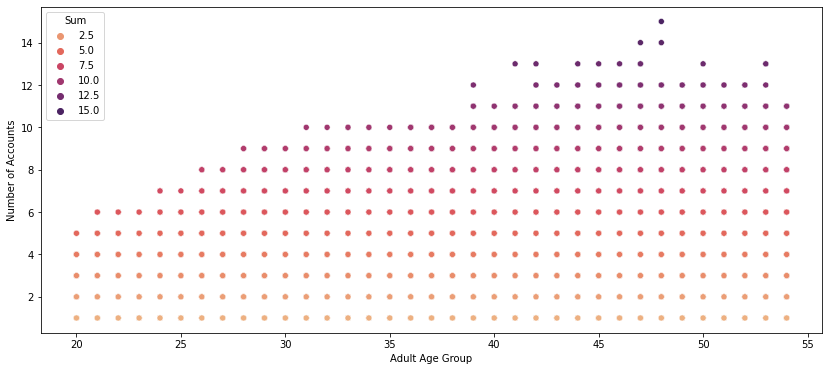

In [236]:
fig, axes = plt.subplots(figsize = (14,6))
sns.scatterplot(x = df_age['Age'], y = df_age['Sum'], hue = df_accounts['Sum'], palette = "flare")
plt.ylabel('Number of Accounts')
plt.xlabel('Adult Age Group')
plt.legend
plt.show()

Customers between the age 30 and 50 tend to have more than 10 banking products in their name.

In [237]:
df1 = df1.transpose()

In [238]:
df1 = df1.reset_index()
df1 

,index,No,Yes
0,Saving_Account,937862,78
1,Guarantees,937925,15
2,Current_Accounts,380419,557521
3,Derivative_Account,937625,315
4,Payroll_Account,864957,72983
5,Junior_Account,930386,7554
6,More_Private_Account,929994,7946
7,Private_Account,838197,99743
8,Private_Plus_Account,904786,33154
9,Short_Term_Deposits,937625,315


In [239]:
df1 = df1.sort_values('Yes', ascending = False)
df1

,index,No,Yes
2,Current_Accounts,380419,557521
21,Direct_Debit,824803,113137
7,Private_Account,838197,99743
12,E_Account,862364,75576
4,Payroll_Account,864957,72983
23,Pensions2,885092,52848
20,Payroll,889626,48314
16,Taxes,892170,45770
17,Credit_Card,903247,34693
8,Private_Plus_Account,904786,33154


In [240]:
df1.rename(columns={'index': 'Types of Accounts', 'Yes': 'Number of Customers with Accounts'}, inplace=True)

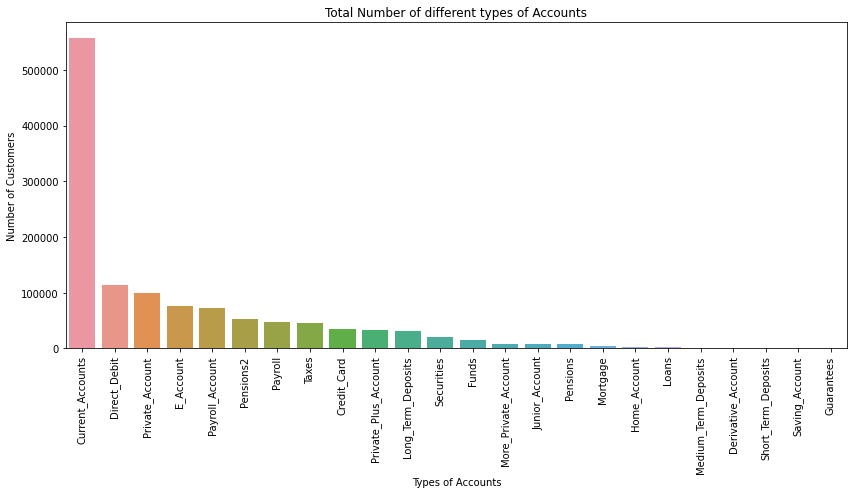

In [241]:
fig, axes = plt.subplots(figsize = (14,6))
sns.barplot(x = df1['Types of Accounts'], y = df1['Number of Customers with Accounts'])
plt.ylabel('Number of Customers')
plt.xlabel('Types of Accounts')
plt.xticks(rotation = 90)
axes.set_title('Total Number of different types of Accounts')
plt.show()

The highest number of accounts sold are Current Accounts, Direct Debit, and Private Account; while the lowest sold accounts are Medium Term Deposits, Short Term Deposits, Derivative accounts, Savings Account and Guarantees

In [242]:
gender = df['Gender'].value_counts(dropna = False)
gender

Female    224483
Male      169031
Name: Gender, dtype: int64

In [243]:
gender.to_csv('Gender.csv')

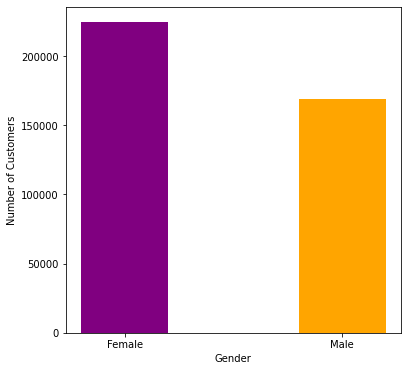

In [244]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(gender.index, gender.values, width=0.4, color = ['Purple', 'Orange'])
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
axes.legend
plt.show()

There are more female customers than male customers in XYZ Credit Union

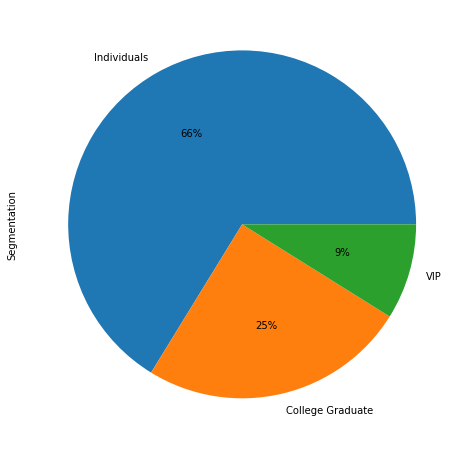

In [247]:
segmentation.plot.pie(y = segmentation.index, figsize=(8,8), autopct='%.0f%%')
plt.show() 

Two-third customers of XYZ Credit Union are individuals. 

In [248]:
income = df['Average_Income_Test'].value_counts()
income

Above Average Income    198877
Below Average Income    194637
Name: Average_Income_Test, dtype: int64

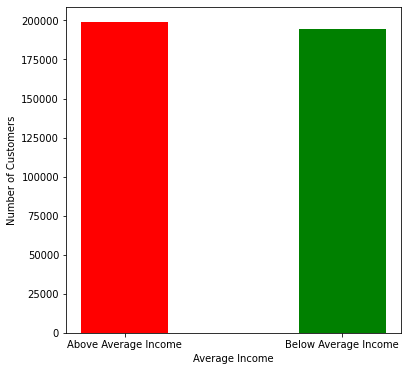

In [249]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(income.index, income.values, width=0.4, color = ['Red', 'Green'])
plt.ylabel('Number of Customers')
plt.xlabel('Average Income')
axes.legend
plt.show()

The number of customers below average income are more than double the number of customers above average income

In [250]:
#top 10 channels

channel = df['Channel_Used'].value_counts()
channel = channel.sort_values(ascending = False)
channel = channel[:10]
channel

KAT    110193
KFC    101475
KHE     59123
KHQ     20963
KHM     20478
KFA     15127
KHN     12573
KHK      9569
RED      5173
KAS      2727
Name: Channel_Used, dtype: int64

In [251]:
channel.to_csv('Channels.csv')

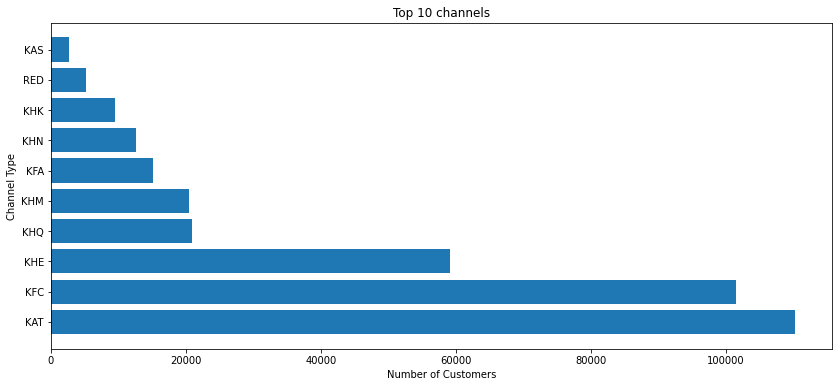

In [252]:
fig, axes = plt.subplots(figsize = (14,6))
axes.barh(channel.index, channel.values)
plt.ylabel('Channel Type')
plt.xlabel('Number of Customers')
axes.set_title('Top 10 channels')
axes.legend
plt.show()

Over a million customers have joined XYZ Credit Union from top 10 Channels presented here.

*Basic Insights*

1. There are more number of Inactive Customers than Active Customer.

2. Some accounts are sold together such as Payroll is highly related to Pensions2 and Payroll Account is correlated with  Pensions2, Payroll, Debit and Credit Card.

3. XYZ Credit Unions's most number of customers are in the Adult Age Group.

4. Customers in the age of 40-50 are more likely to possess more than 10 different banking product at XYZ Credit Union.

5. The highest number of accounts sold are Current Accounts, Direct Debit, and Private Account; while the lowest sold accounts are Medium Term Deposits, Short Term Deposits, Derivative accounts, Savings Account and Guarantees.

6. There are more female customers than male customers in XYZ Credit Union.

7. There are approximately 130,000 individuals have accounts with XYZ Credit Union. Nearly 20,000 VIP members are associated with the Union.

8. Customers with below average income are more than the customers with above average income.

9. The number of individual customers are more than the total number of college graduates and VIPs. 

10. Over a million customer have joined XYZ Credit Union through top 10 channels out of total 147 channels.

**Recommendations for cross-selling of banking products**

I. Introducing loyalty programs such as health insurance or rewards for engaging with the account may increase the use of accounts that have been inactive for a while (dormant accounts). 

II. Current account is the most selling banking product in XYZ Credit Union. For the customers having current accunt, scheme of gaining higher interest such as 4.5%, for keeping certain amount in savings account will increase sale of savings account.

III. Providing certain benefits to provincial and federal government for projects such as construction, may increase sale of Guarantees.

IV. Engaging more with adults through social media coverage or advertising will help customers well understand product/services provided by XYZ Credit Union. Direct mail, email, statement inserts, banner ads on website, messages on ATMs, outbound calling campaigns, etc. can be applied as part of customer engagement. 

V. Engaging more with the top 10 channels used by customers to join the Union will increases chances of getting more customers. 